## Kort intro til databehandling

Dette er blot en lille introduktion til at arbejde med data.
Jeg tager udgangspunkt i tilgængelig data fra Miljøportalen. Da jeg er ansat i Egedal Kommune, er det nærliggende at kigge på Værebro Å.

Lad os starte med at se på vandstandsmålinger ved Snydebro:

In [19]:
import pandas as pd

vst = pd.read_csv('VandstandCSV.csv')
vst.head() # Lad os nøjes med de første 5 resultater, da der er over 300 rækker

,Stationsnr;Stationsnavn;StationensLokalitet;Stationsejer;GeoZone;Xutm;Yutm;Dato;Parameter;Resultat;Enhedsnavn;Kvalitetssikring;Kvalitetsstatus
0,520299;Snydebro;Værebro å;Egedal kommune;32;70...
1,520299;Snydebro;Værebro å;Egedal kommune;32;70...
2,520299;Snydebro;Værebro å;Egedal kommune;32;70...
3,520299;Snydebro;Værebro å;Egedal kommune;32;70...
4,520299;Snydebro;Værebro å;Egedal kommune;32;70...


Det ser lidt rodet ud. Lad gøre det lidt pænere:

In [20]:
import pandas as pd

vst = pd.read_csv('VandstandCSV.csv', sep=';')
vst.head()

,Stationsnr,Stationsnavn,StationensLokalitet,Stationsejer,GeoZone,Xutm,Yutm,Dato,Parameter,Resultat,Enhedsnavn,Kvalitetssikring,Kvalitetsstatus
0,520299,Snydebro,Værebro å,Egedal kommune,32,705175,6183431,2016-01-01,Vandstand,2.97,m,FagK,GODK
1,520299,Snydebro,Værebro å,Egedal kommune,32,705175,6183431,2016-01-02,Vandstand,2.90,m,FagK,GODK
2,520299,Snydebro,Værebro å,Egedal kommune,32,705175,6183431,2016-01-03,Vandstand,2.81,m,FagK,GODK
3,520299,Snydebro,Værebro å,Egedal kommune,32,705175,6183431,2016-01-04,Vandstand,2.73,m,FagK,GODK
4,520299,Snydebro,Værebro å,Egedal kommune,32,705175,6183431,2016-01-05,Vandstand,2.67,m,FagK,GODK


Det var bedre. Her er en masse informationer, men mange af dem går igen og der er kun to kolonner der er interesante - 'Dato' og 'Resultat'.
Lad os arrangere lidt på indholdet.

In [23]:
vst = pd.read_csv('VandstandCSV.csv', sep=';', parse_dates=['Dato'], index_col=['Dato'])
vst.head()

,Stationsnr,Stationsnavn,StationensLokalitet,Stationsejer,GeoZone,Xutm,Yutm,Parameter,Resultat,Enhedsnavn,Kvalitetssikring,Kvalitetsstatus
Dato,,,,,,,,,,,,
2016-01-01,520299,Snydebro,Værebro å,Egedal kommune,32,705175,6183431,Vandstand,2.97,m,FagK,GODK
2016-01-02,520299,Snydebro,Værebro å,Egedal kommune,32,705175,6183431,Vandstand,2.90,m,FagK,GODK
2016-01-03,520299,Snydebro,Værebro å,Egedal kommune,32,705175,6183431,Vandstand,2.81,m,FagK,GODK
2016-01-04,520299,Snydebro,Værebro å,Egedal kommune,32,705175,6183431,Vandstand,2.73,m,FagK,GODK
2016-01-05,520299,Snydebro,Værebro å,Egedal kommune,32,705175,6183431,Vandstand,2.67,m,FagK,GODK


Sådan. Nu er datoen styrende for resten af indholdet.
Vi kan også kigge på dato og resultat alene:

In [24]:
vst['Resultat'].head()

Dato
2016-01-01    2.97
2016-01-02    2.90
2016-01-03    2.81
2016-01-04    2.73
2016-01-05    2.67
Name: Resultat, dtype: float64

Men lad os komme til det sjove - visualisering. Noget Jupyter er god til, udover at være et fremragende arbejdsprogram, er visualiseringer. Ved at bruge forskellige biblioteker som matplotlib og/eller plotly, kan man skabe flotte visualiseringer.
Til vores datasæt, gør matplotlib et ganske fint arbejde. Lad os se:

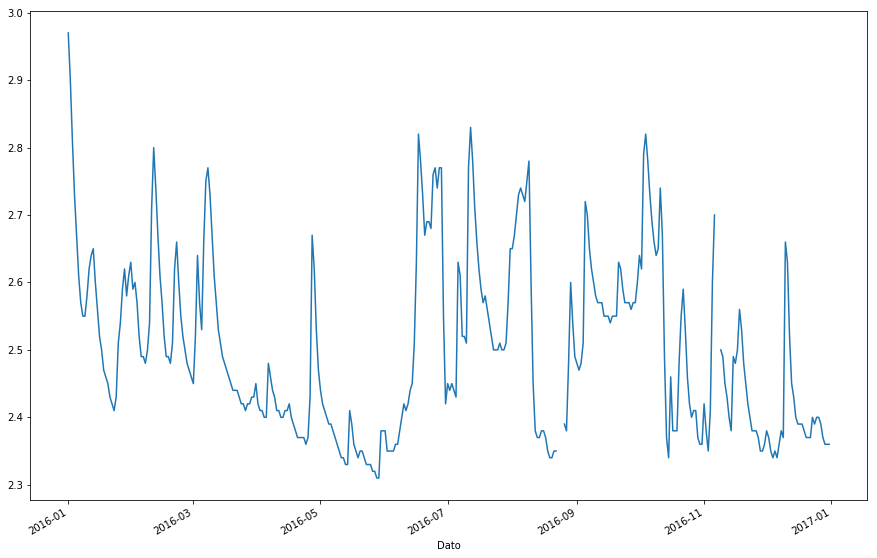

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

vst['Resultat'].plot(figsize=(15, 10))

Udover diverse grafer, kan vi også kigge lidt på analyser af data:

In [13]:
vst.describe()

,Stationsnr,GeoZone,Xutm,Yutm,Resultat
count,363.0,363.0,363.0,363.0,361.000000
mean,520299.0,32.0,705175.0,6183431.0,2.501994
std,0.0,0.0,0.0,0.0,0.131125
min,520299.0,32.0,705175.0,6183431.0,2.310000
25%,520299.0,32.0,705175.0,6183431.0,2.390000
50%,520299.0,32.0,705175.0,6183431.0,2.480000
75%,520299.0,32.0,705175.0,6183431.0,2.590000
max,520299.0,32.0,705175.0,6183431.0,2.970000


Igen lidt for meget ikke-brugbar data. Lad os analysere på det der er vigtigt - vandstanden.

In [16]:
vst['Resultat'].describe()

count    361.000000
mean       2.501994
std        0.131125
min        2.310000
25%        2.390000
50%        2.480000
75%        2.590000
max        2.970000
Name: Resultat, dtype: float64

Dette var blot en ultra kort introduktion fra min side.
Med jupyter notebook, numpy, pandas, geopandas, plotly og mange flere, kan man analysere og visualisere alverdens former for data.
Som en lille teaser omkring visualiseringer, vil jeg opfordre Jer til at kigge lidt på [plotly](https://plot.ly/). Graferne kan oven i købet eksporteres som html og javascript, så de let kan integreres på en hjemmeside. 